##Project Description
The **Smartwatch Project** aims to analyze and gain insights from data generated by a smartwatch. This includes details such as user demographics, activity metrics, and physiological measurements, with a focus on understanding patterns and relationships that may provide actionable health and fi tness insights. Your task will involve exploratory data analysis, preprocessing, visualization, and creating a final report.

##Problem Statement
Using the provided smartwatch data, analyze patterns in heart rate, step count, activity intensity, and other physiological indicators to understand how these variables interact with each other and with user demographics. Provide insights on user health and activity patterns, addressing:

###Project Breakdown and Step-by-Step Guide

Part 1: Data Cleaning and Preprocessing

Objective: Clean and prepare the dataset for analysis.

Part 2: Exploratory Data Analysis (EDA)

Objective: Explore and visualize relationships in the dataset.

1.What are the most infl uential factors for calories burned?

2.How does heart rate vary with diff erent activities?

3.How can steps and distance data predict user intensity levels?

4.What other interesting correlations can be identifi ed within the dataset?

In [5]:
# Import necessary libraries

# For data manipulation and analysis with DataFrames
import pandas as pd

# For numerical operations and working with arrays
import numpy as np

# For creating static data visualizations
import matplotlib.pyplot as plt

# For advanced statistical data visualizations
import seaborn as sns

# For splitting data into training and test sets
from sklearn.model_selection import train_test_split

# For implementing linear regression models
from sklearn.linear_model import LinearRegression

# For scaling features and encoding categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder

# For evaluating model performance with metrics
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reason for the action:** This command mounts your Google Drive to the Colab environment, allowing you to access, read, and write files stored in your Google Drive directly from the Colab notebook. It is particularly useful when working with large datasets, saving results, or accessing pre-trained models stored in your Google Drive.

**Potential outcome:** Once executed, you will be prompted to authorize access to your Google Drive. After authorization, your Google Drive will be accessible at the specified path (/content/drive), enabling seamless interaction with files and folders in your Drive within the Colab environment.

In [7]:
# Load the dataset
file_path = '/content/drive/My Drive/EnvisionVirtue/smartwatch.csv'
df = pd.read_csv(file_path)

**Reason for the action:** This command is used to load a dataset (smartwatch.csv) stored in your Google Drive into a Pandas DataFrame. By specifying the file path, the code reads the CSV file and converts its contents into a structured format, making it easier to analyze and manipulate the data using Python.

**Potential outcome:** After running this code, the dataset will be successfully loaded into the variable df as a DataFrame. This allows you to perform various operations such as data cleaning, exploratory data analysis (EDA), feature engineering, and model building on the smartwatch data.

In [8]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


**Reason for the action:** This command is used to display the first few rows (default is 5) of the dataset. It provides a quick overview of the data structure, including column names, data types, and sample values. This step is crucial for verifying that the dataset has been loaded correctly and for gaining initial insights into its content.

Purpose: The goal is to confirm that the dataset matches expectations, identify any obvious issues such as missing or inconsistent data, and understand the layout of the data before proceeding with further analysis.

**Potential outcomes:**

If omitted: You may proceed with the analysis without understanding the data structure, leading to potential errors or misinterpretation of the dataset.
If done differently (e.g., displaying all rows): It could overwhelm the output with unnecessary information, especially for large datasets, making it harder to focus on the relevant details. Displaying a manageable subset helps maintain clarity and focus during the initial exploration.

In [9]:
# Display column names before renaming
print("Column names before renaming:", df.columns)

Column names before renaming: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


**Reason for the action:** This step is performed to inspect the current column names in the dataset. Reviewing column names is essential to identify potential issues such as misspellings, redundant prefixes (e.g., "Unnamed: 0"), inconsistent naming formats, or unclear labels that might hinder the clarity and usability of the data during analysis.

Purpose: The goal is to prepare for renaming columns in a meaningful, consistent, and descriptive manner. This ensures that column names are intuitive, improving code readability and preventing errors during analysis or feature selection.

**Potential Outcome:**

After running the command, the column names of the dataset will be displayed, allowing for a clear understanding of the current structure. For example, the dataset contains columns such as Unnamed: 0, age, gender, steps, hear_rate, etc. Some column name like hear_rate appear to have typographical errors, while others like Unnamed: 0 might not hold meaningful information. Identifying such issues at this stage is crucial for deciding which columns may need renaming, cleaning, or removal.

If omitted: You might proceed with the analysis without recognizing errors or ambiguities in column names, potentially leading to incorrect data interpretation or processing steps later. For instance, typographical errors could cause issues when referencing columns in your analysis.

If done differently (e.g., renaming without reviewing): You risk renaming columns inaccurately or missing critical inconsistencies, which could create confusion or errors during subsequent analysis. Reviewing column names first ensures that renaming is intentional and precise.

In [10]:
# Rename the 'hear_rate' column to 'heart_rate'
df.rename(columns={'hear_rate': 'heart_rate'}, inplace=True)

**Reason for the action:** This step renames the column hear_rate to heart_rate to correct a typographical error. Accurate and descriptive column names improve the readability and understanding of the dataset, making it easier to reference and process during analysis.

Purpose: The goal is to standardize the column naming convention and ensure that the name accurately reflects the data it contains. This correction prevents confusion when accessing the column later in the analysis.

**Potential outcomes:**

If omitted: The misspelled column name hear_rate may cause confusion or errors when referencing the column in the analysis, especially in collaborative settings.

If done differently (e.g., renaming incorrectly): Renaming the column inaccurately could lead to further issues, such as creating duplicate column names or referencing a non-existent column, disrupting the workflow and analysis. Properly correcting the name ensures clarity and accuracy in data processing.

In [11]:
# Display column names after renaming
print("Column names after renaming:", df.columns)

Column names after renaming: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


**Reason for the action:** This step displays the column names after the renaming operation, allowing us to confirm that the intended changes (e.g., renaming hear_rate to heart_rate) have been successfully applied. It provides an opportunity to review the updated structure of the dataset and ensures the consistency of column names before proceeding with further analysis.

Purpose: The goal is to verify that the renaming of columns has been completed correctly and to inspect if other columns require further cleaning or adjustments. This check ensures that the dataset is in the desired format for analysis.

**Potential outcomes:**

If omitted: You might not be able to confirm whether the renaming process was successful, which could lead to inconsistencies or errors if further operations are performed on the dataset.

If done differently (e.g., skipping this step): Without verifying the changes, you may overlook issues or errors in renaming, leading to confusion or mistakes during later stages of data analysis. Ensuring accuracy at this step helps maintain data integrity throughout the process.

In [12]:
# Save the updated dataframe back to a CSV file
df.to_csv('/content/drive/My Drive/EnvisionVirtue/smartwatch_updated.csv', index=False)

**Reason for the action:** This step saves the updated dataframe to a new CSV file. By specifying the path 'smartwatch_updated.csv', it ensures that the changes made to the dataset (such as renaming columns) are preserved and stored in a separate file for future use. Setting index=False ensures that the index is not included in the output file, making the CSV cleaner and easier to work with.

Purpose: The goal is to preserve the modified dataset in a new file, allowing you to maintain the original data file while saving the updated version for further analysis or sharing with collaborators. This step ensures that all changes are saved and that you can easily access the cleaned dataset without affecting the original.

**Potential outcomes:**

If omitted: The changes made to the dataset (like renaming columns) would be lost once the session ends, as no new file would be saved. This could result in having to repeat the cleaning process.

If done differently (e.g., overwriting the original file): If you overwrite the original dataset without backing it up, you risk losing the unmodified version of the data in case you need it later for comparison or reference. Saving to a new file ensures data integrity and flexibility in future analysis.

In [13]:
# Confirm the change by loading the updated file
df_updated = pd.read_csv('/content/drive/My Drive/EnvisionVirtue/smartwatch_updated.csv')
print("Updated columns:", df_updated.columns)

Updated columns: Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


## Part 1: Data Cleaning and Preprocessing
### Objective: Clean and prepare the dataset for analysis.
### Step 1: Handle Missing Values
#### Identify missing values and handle them using imputation or deletion.

In [14]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


**Reason for the action:** This step checks for any missing or null values in the dataset by using the .isnull() method, which returns a boolean DataFrame indicating whether each value is missing (True) or not (False). The .sum() function then counts the number of missing values in each column. This allows us to quickly assess the completeness of the dataset before proceeding with any analysis or model-building.

Purpose: The purpose is to identify any columns with missing data, so that appropriate actions (such as imputation, removal, or further cleaning) can be taken. Ensuring that the dataset does not contain missing values is crucial for accurate analysis and model training.

**Potential Outcome:**

After executing this step, it is confirmed that there are no missing values in any of the columns in the dataset. Each column has a count of zero missing values, ensuring that the dataset is complete and ready for analysis. This is important as missing values, if present, could introduce biases or errors into the analysis and would require handling through imputation or removal.

If omitted: If this check were skipped, any missing values would go undetected, potentially leading to issues during analysis or model building, as many algorithms do not handle missing data effectively without specific preprocessing.

If done differently (e.g., overlooking missing values): Without identifying and addressing missing values, data integrity could be compromised, affecting the reliability of insights drawn from the dataset and the accuracy of predictive models built on it.

In [15]:
# Impute or drop missing values
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=np.number).columns

# Impute with mean for numeric columns only
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop rows if too many missing values are in a row
df.dropna(inplace=True)

**Reason for the action:**

Selecting Numeric Columns for Imputation: The first step selects only the numeric columns from the dataset using select_dtypes(include=np.number). This ensures that imputation is performed only on numerical data, as categorical data requires different handling (such as mode imputation or encoding).

Imputing Missing Values: Next, missing values in the numeric columns are filled using the mean of each respective column with fillna(df[numeric_cols].mean()). This helps to maintain the integrity of the dataset by replacing missing values with a reasonable estimate, the mean, without introducing additional complexity like dropping data. It is especially useful when the percentage of missing values is small.

Dropping Rows with Excessive Missing Values: Finally, the dropna() function removes any rows that have too many missing values. This ensures that rows with insufficient data are discarded, preventing them from affecting the analysis or model-building process.

Purpose: The purpose is to handle missing values efficiently. Imputing missing values in numeric columns prevents data loss and ensures that the dataset remains complete for analysis. Dropping rows with excessive missing values helps eliminate outliers or irrelevant data points that could skew results.

**Potential outcomes:**

If omitted:

The dataset might contain missing values, which could lead to errors in subsequent analysis or model training, as many machine learning algorithms do not handle missing data by default.
Missing data in numerical columns, if not imputed, may distort the dataset and introduce bias, affecting the accuracy of predictions or insights.
If done differently (e.g., imputing with other methods or not dropping rows):

Imputing with methods other than the mean (such as median or mode) may be more appropriate in some cases, depending on the data distribution and the presence of outliers. This could affect the dataset’s accuracy and the performance of models trained on it.
Dropping rows without sufficient justification could result in loss of valuable data, especially if the missing values are minimal or represent a small fraction of the dataset. However, if too many missing values are present in rows, keeping them could negatively affect the analysis. Thus, ensuring the right balance between imputation and removal is key for maintaining the integrity of the dataset.

### Step 2: Remove Duplicates
####  Ensure there are no duplicate entries in the dataset.

In [16]:
# Check and remove duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


**Reason for the action:**

Checking for Duplicates: The df.duplicated().sum() function checks for duplicate rows in the dataset. It returns a boolean series indicating whether each row is a duplicate (True) or not (False). Using .sum() gives the total count of duplicated rows. This step helps identify any repeated records that might distort the analysis or model.

Removing Duplicates: If duplicates are found, df.drop_duplicates(inplace=True) removes them from the dataset. The inplace=True argument ensures that the changes are made directly to the existing dataframe, rather than returning a new one.

**Potential Outcome:**

After executing this step, it is confirmed that there are no duplicate rows in the dataset, as indicated by the output of Duplicates: 0. This ensures that the dataset is free of redundant records and ready for further analysis without the risk of bias or distortion caused by repeated entries.

If omitted:

If this step were skipped, any duplicate rows could have remained in the dataset, which could lead to skewed analysis or model predictions, especially if duplicates are present in significant numbers. Duplicates can artificially inflate the influence of certain data points.
If done differently (e.g., handling duplicates differently):

While duplicates are typically removed to ensure data integrity, in some cases, retaining them may be appropriate (for instance, if duplicates represent valid repeated measurements). However, in this case, since no duplicates were found, no further action was necessary.

### Step 3: Data Transformation
#### Convert data types, such as categorical encoding and normalization.

In [17]:
# Convert gender to categorical data type
df['gender'] = LabelEncoder().fit_transform(df['gender'])

**Reason for the action:**

Converting 'gender' to Categorical Data: The LabelEncoder().fit_transform() method is used to convert the 'gender' column, which likely contains categorical values (such as "Male" and "Female"), into numerical labels. The fit_transform() function encodes the unique categories as integers. This is important because many machine learning algorithms require numerical inputs, and converting categorical variables to numbers is a common preprocessing step.
Purpose: The purpose of this action is to transform categorical data into a numerical format that can be effectively used by machine learning models. By encoding the 'gender' feature, we ensure that it is compatible with algorithms that expect numerical data types, which improves model performance.

**Potential outcomes:**

If omitted:
If this step were omitted, machine learning models may fail to process the 'gender' column correctly, as most algorithms do not handle string-based categorical values. This could result in errors or inaccurate model performance.

If done differently (e.g., using one-hot encoding or another method):
An alternative method such as one-hot encoding could also be used to convert categorical data into binary features (i.e., "Male" = [1, 0], "Female" = [0, 1]). While this creates additional columns, it can be beneficial for algorithms that do not assume an ordinal relationship between categories. Label encoding is simple and efficient for binary categorical variables, but one-hot encoding may be preferred for features with more than two categories.

In [18]:
# Normalize continuous variables if necessary
scaler = StandardScaler()
df[['heart_rate','steps', 'distance', 'calories']] = scaler.fit_transform(df[['heart_rate','steps', 'distance', 'calories']])

**Reason for the action:**

Normalizing Continuous Variables: The StandardScaler() is used to standardize or normalize continuous numerical variables. In this case, the 'heart_rate', 'steps', 'distance', and 'calories' columns are scaled so that each feature has a mean of 0 and a standard deviation of 1. The fit_transform() method is applied to the selected columns to adjust the values accordingly.
Purpose: The purpose of this action is to ensure that the continuous variables are on a similar scale. Many machine learning algorithms, such as those based on distance (e.g., K-Nearest Neighbors, Support Vector Machines), perform better when the features are scaled to a common range. Normalization prevents variables with larger ranges from dominating the model's performance, ensuring that all variables contribute equally.

**Potential outcomes:**

If omitted:
If normalization is skipped, the model might give more importance to features with larger numeric ranges (e.g., 'distance' or 'calories'), which could negatively impact the accuracy of the model. Features with smaller ranges, like 'heart_rate', may be underrepresented in the model's decision-making process.

If done differently (e.g., using Min-Max scaling or no scaling):
Other scaling methods, like Min-Max scaling, would transform the features to a fixed range (e.g., 0 to 1), which might be preferred in cases where specific bounds are important. However, StandardScaler is typically more effective in most machine learning tasks because it centers the data and allows models to learn from the actual distribution of the data. In cases where scaling is not applied, some models (such as tree-based algorithms) may still perform adequately, but scaling is generally a good practice to improve the performance of other models.

### Step 4: Outlier Detection
#### Detect and handle outliers in columns like steps and calories.

In [19]:
# Outlier detection using Z-score
from scipy.stats import zscore
outliers = (np.abs(zscore(df[['heart_rate','steps', 'calories']])) > 3).any(axis=1)
df = df[~outliers]

**Reason for the action:**

Outlier Detection Using Z-score: The Z-score is a statistical method used to identify outliers in a dataset. It measures how many standard deviations a data point is from the mean. In this step, the Z-score is calculated for the 'heart_rate', 'steps', and 'calories' columns. The condition (np.abs(zscore(df[['heart_rate','steps', 'calories']])) > 3) checks if any data point's Z-score is greater than 3 or less than -3 (which indicates it is more than 3 standard deviations away from the mean). If so, those rows are considered outliers. The df = df[~outliers] step removes those outlier rows from the dataset.
Purpose: The purpose of this step is to identify and remove any extreme outliers that could distort the analysis or model training. Outliers can negatively affect certain machine learning algorithms, especially those sensitive to data distribution, such as linear regression or k-means clustering.

**Potential outcomes:**

If omitted:
If outliers are not removed, they could disproportionately influence the analysis or model performance. For example, they could distort the accuracy of regression models or other models that rely on the assumption of normally distributed data. This could lead to incorrect or biased predictions.

If done differently (e.g., using a different threshold or method):
If a different threshold for outlier detection is used (e.g., using a Z-score of 2 or 4), it may result in more or fewer data points being considered outliers. Alternatively, other methods such as the IQR (Interquartile Range) could be used for outlier detection. While the Z-score method is effective for normally distributed data, the IQR method might work better for skewed distributions. The choice of method should depend on the nature of the data and the specific requirements of the analysis.

## Part 2: Exploratory Data Analysis (EDA)
### Objective: Explore and visualize relationships in the dataset.
### Step 1: Summary Statistics

In [20]:
# Summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())

Summary Statistics:
         Unnamed: 0           X1          age       gender       height  \
count  6039.000000  6039.000000  6039.000000  6039.000000  6039.000000   
mean   3170.318596  1757.941381    29.194734     0.481371   169.663802   
std    1819.370595  1096.792571     8.946577     0.499694    10.350439   
min       1.000000     1.000000    18.000000     0.000000   143.000000   
25%    1561.500000   780.500000    23.000000     0.000000   160.000000   
50%    3203.000000  1701.000000    28.000000     0.000000   168.000000   
75%    4754.500000  2741.000000    33.000000     1.000000   180.000000   
max    6264.000000  3670.000000    56.000000     1.000000   191.000000   

            weight        steps   heart_rate     calories     distance  \
count  6039.000000  6039.000000  6039.000000  6039.000000  6039.000000   
mean     69.598245    -0.129073    -0.037656     0.023396     0.011002   
std      13.229134     0.697169     0.962232     1.010504     1.016886   
min      43.0000

**Reason for the action:**

The describe() function is used to generate summary statistics for all the numerical columns in the dataframe. This includes key metrics like count, mean, standard deviation, minimum, maximum, and percentiles (25%, 50%, 75%). These statistics give an overview of the distribution of the data and help to identify any irregularities or trends.
Purpose:

The purpose of this step is to understand the central tendency, spread, and shape of the numerical data. This is important for detecting potential issues like skewness or outliers and ensuring the data is ready for further analysis. For example, identifying columns with a very high or low mean, or values outside the expected range, can inform the next steps in data cleaning and processing.

**Potential Outcomes:**

If omitted: Without summary statistics, we may overlook potential problems such as skewed data, extreme values, or outliers, which can impact further analysis or modeling.

If done differently: While describe() provides an overall snapshot, additional techniques like data visualization (e.g., histograms, box plots) or advanced statistical methods (e.g., skewness and kurtosis) could offer deeper insights into the data's distribution and behavior. However, describe() remains a quick and effective way to understand the numerical features in a dataset at the outset of the analysis.

### Step 2: Data Visualization
#### Visualize age and gender distributions.

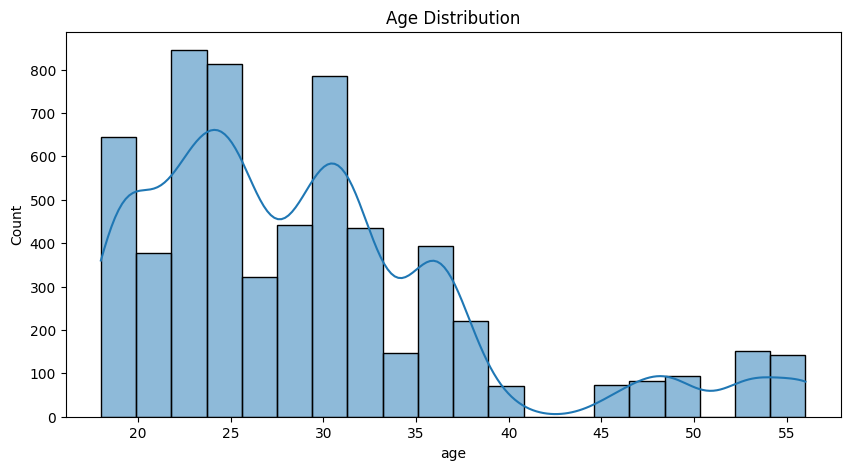

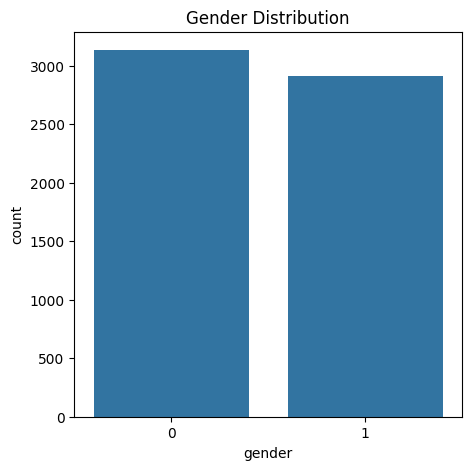

In [21]:
# Age and gender distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

**Reasoning for Age Distribution:**

An age distribution plot (histogram) is a valuable tool for understanding the spread and characteristics of age data within a dataset. It visually represents the number of individuals within different age groups (bins). Analyzing the age distribution helps identify patterns such as:

Dominant age groups: The histogram reveals which age groups have the highest concentration of individuals.
Age range and variability: The histogram shows the overall age range covered by the data and how spread out the data is (wider distribution indicates more age variability).

**Potential Outcomes of Omitting or Changing Steps:**

Omitting plt.figure(figsize=(10, 5)): If this line is omitted, the plot would be generated with a default size, which might be too small or large depending on your needs.

Omitting kde=True: Excluding the density curve might result in a less informative visualization, particularly for smaller datasets where the histogram might appear blocky. The density curve helps smooth out the data and potentially reveal underlying trends.

Changing bins=20: The number of bins can significantly impact the appearance and interpretability of the histogram. Too few bins can result in a very coarse representation, potentially hiding details within the data. Conversely, too many bins can lead to an overly smoothed-out plot, making it challenging to identify specific patterns. Finding the optimal number of bins often involves experimentation to achieve a balance between capturing details and maintaining readability.

---

**Reasoning for Gender Distribution:**

A gender distribution plot (count plot) is a helpful tool for understanding the proportion of individuals belonging to each gender category within a dataset. It visually represents the counts of observations for each gender. Analyzing the gender distribution helps identify potential imbalances or skewness in the data.

**Potential Outcomes of Omitting or Changing Steps:**

Omitting plt.figure(figsize=(5, 5)): If this line is omitted, the plot would be generated with a default size, which might be too small or large depending on your needs.

Using a different plot type: While a count plot is suitable for visualizing categorical variables with a limited number of categories (like gender), other plots might be more appropriate for continuous variables. For instance, you might use a histogram to visualize the distribution of age data.

Changing the variable on the x-axis: The code plots the distribution based on the 'gender' column. If you have a different categorical variable in your data that you want to explore, you can modify the x argument in the sns.countplot function accordingly.


#### Heart Rate vs. Activity

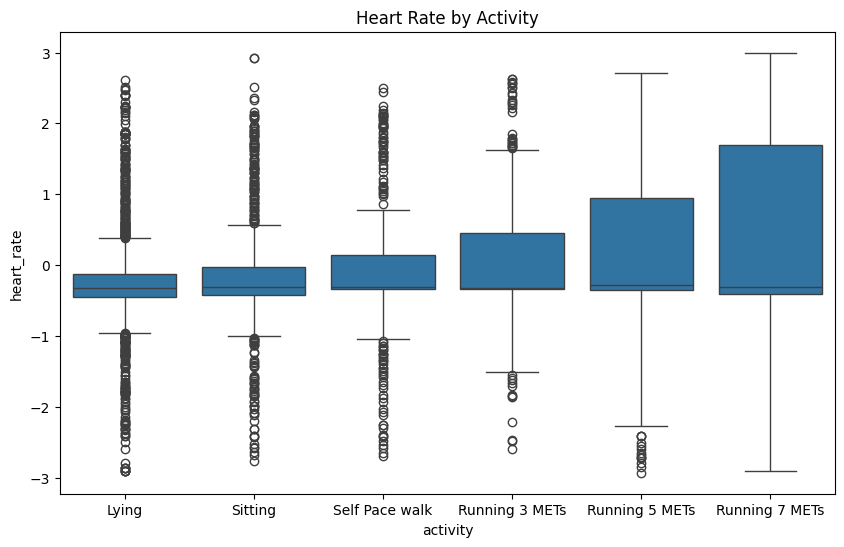

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='activity', y='heart_rate')
plt.title('Heart Rate by Activity')
plt.show()

**Reasoning:**

The boxplot illustrates the distribution of heart rate across different activity levels. The boxes show the interquartile range (IQR), with the median marked by a line. Whiskers extend to 1.5 times the IQR, and outliers are plotted as dots. As activity level increases, the median heart rate generally rises, with greater variability in heart rate at higher intensity levels.

**Potential Outcomes:**

Omitting data cleaning: Outliers or errors in the data could skew the results, leading to inaccurate conclusions about heart rate trends.

Using a different visualization: A line graph might not capture the distribution of heart rates as well, potentially hiding important details.

Not considering individual differences: The plot shows average trends, but individual variations in heart rate response to activity need to be considered.

#### Calories Burned Analysis

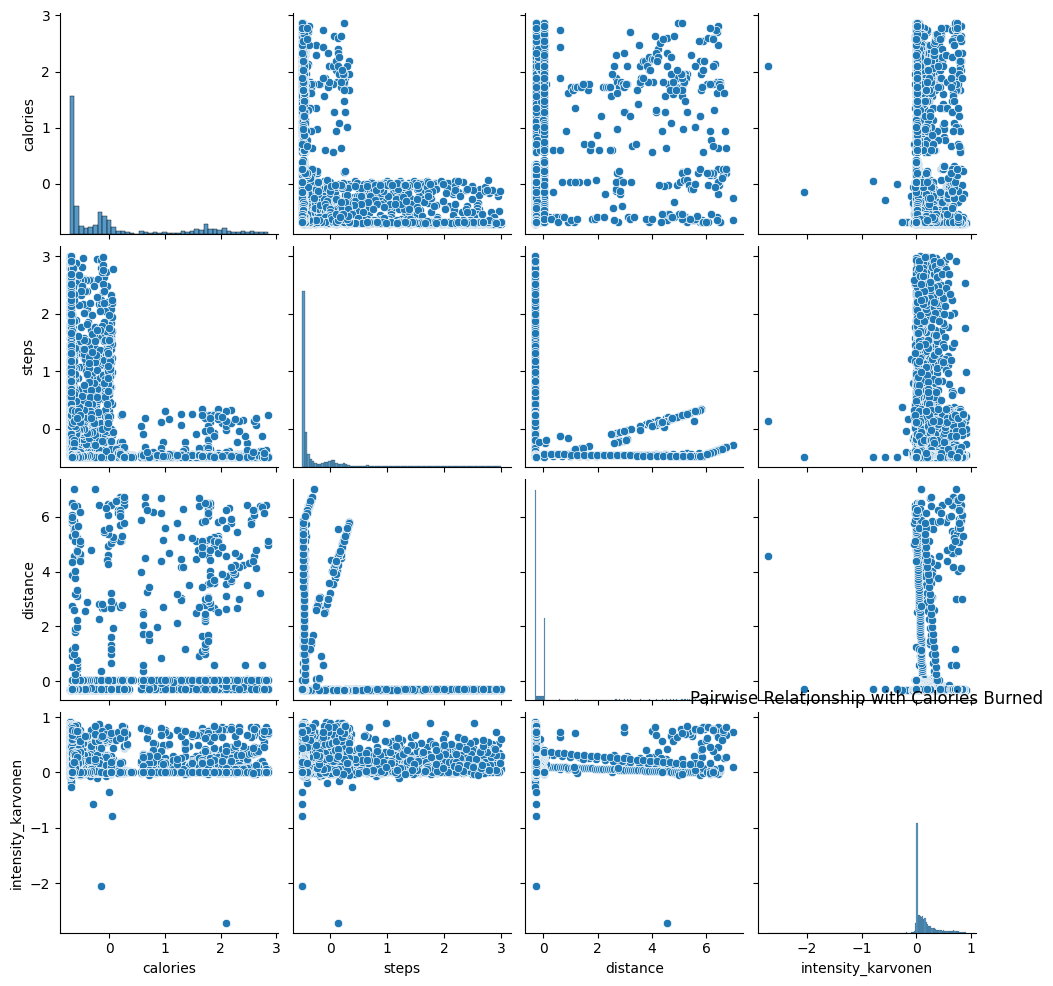

In [23]:
sns.pairplot(df[['calories', 'steps', 'distance', 'intensity_karvonen']])
plt.title('Pairwise Relationship with Calories Burned')
plt.show()

**Reasoning:**

The plot visualizes the pairwise relationships between variables like calories, steps, distance, and intensity. The diagonal plots show the distribution of each variable, while the off-diagonal plots display scatter plots for each pair of variables. The pattern of points in the scatter plots suggests the strength and direction of the relationship between the variables.

**Potential Outcomes:**

Omitting data cleaning: Outliers or errors in the data could distort the relationships between variables, leading to misleading conclusions.

Using a different visualization: A correlation matrix might be more compact but could hide nuances in the relationships between variables.

Not considering multicollinearity: If two variables are highly correlated, it could impact the interpretation of their relationship with other variables.

#### Correlation Analysis

In [24]:
# Select continuous variables of interest
continuous_vars = ['heart_rate', 'calories', 'distance', 'steps']

In [25]:
# Calculate the correlation matrix
correlation_matrix = df[continuous_vars].corr()

In [26]:
# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
             heart_rate  calories  distance     steps
heart_rate    1.000000 -0.122157 -0.061098  0.109990
calories     -0.122157  1.000000  0.250602 -0.250265
distance     -0.061098  0.250602  1.000000 -0.076656
steps         0.109990 -0.250265 -0.076656  1.000000


**Reasoning:**

The correlation matrix shows the linear relationships between numerical variables. A value of 1 indicates a perfect positive correlation, -1 a perfect negative correlation, and 0 no linear relationship. For example, heart_rate and steps have a weak positive correlation, while calories and steps have a moderate negative correlation.

**Potential Outcomes:**

Omitting data cleaning: Outliers or errors in the data could distort the correlation coefficients, leading to inaccurate conclusions about the relationships between variables.

Not considering the context: Correlation does not imply causation. A correlation between two variables might be due to a third, unmeasured variable.

Misinterpreting correlation: A high correlation coefficient does not necessarily mean a strong practical relationship. The context and the specific use case need to be considered.

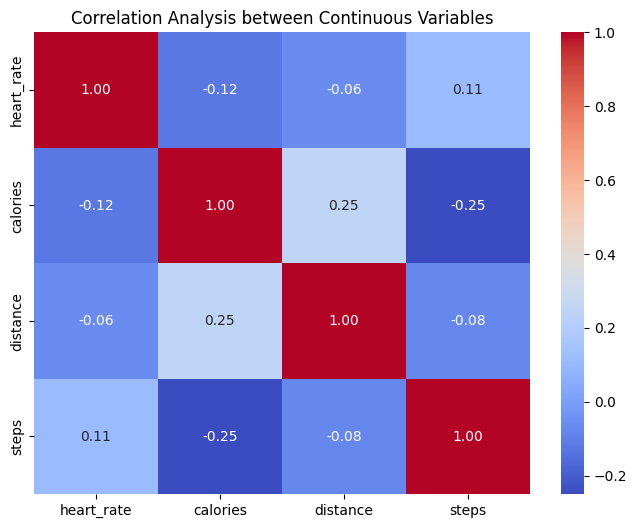

In [27]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis between Continuous Variables")
plt.show()

**Reasoning:**

The heatmap visualizes the correlation matrix, showing the strength and direction of the relationships between numerical variables. The color intensity represents the correlation coefficient, with red indicating positive correlation, blue negative correlation, and white no correlation.

**Potential Outcomes:**

Omitting data cleaning: Outliers or errors in the data could distort the correlation coefficients, leading to misleading conclusions about the relationships between variables.

Not considering the context: Correlation does not imply causation. A correlation between two variables might be due to a third, unmeasured variable.

Misinterpreting correlation: A high correlation coefficient does not necessarily mean a strong practical relationship. The context and the specific use case need to be considered.

## Part 3: Feature Engineering and Model Building
### Objective: Engineer features and test simple predictive models
#### Feature Engineering

In [28]:
# Calculate steps per calorie
df['steps_per_calorie'] = df['steps'] / (df['calories'] + 1)  # Adding 1 to prevent division by zero

In [29]:
# Calculate distance per step
df['distance_per_step'] = df['distance'] / (df['steps'] + 1)  # Adding 1 to prevent division by zero

In [30]:
# Display the new features
print("New Features:\n", df[['steps_per_calorie', 'distance_per_step']].head())

New Features:
    steps_per_calorie  distance_per_step
0          -1.480317          -0.540709
1          -1.080889          -0.537634
2          -0.689205          -0.534594
3          -0.658720          -0.531588
4          -0.630426          -0.528616


**Reasoning:**

The code calculates new features: steps_per_calorie and distance_per_step. These features provide insights into the efficiency of calorie burn and step length, respectively. By dividing steps by calories and distance by steps, we get a relative measure of how many steps are taken per calorie burned and how much distance is covered per step.

**Potential Outcomes:**

Omitting data cleaning: Outliers or errors in the data could distort the calculated features, leading to inaccurate interpretations.

Not considering the context: These features might not be meaningful for all individuals or activities. Factors like body weight, fitness level, and terrain can influence the relationship between steps, calories, and distance.

Misinterpreting the features: A high steps_per_calorie might not necessarily indicate efficient calorie burn. It could be due to low-intensity activities or inaccurate calorie tracking.

In [31]:
# Normalization: Apply StandardScaler to continuous features for modeling
scaler = StandardScaler()
continuous_vars = ['heart_rate', 'steps', 'distance', 'calories', 'steps_per_calorie', 'distance_per_step']
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [32]:
# Display the normalized features
print("Normalized Features:\n", df[continuous_vars].head())

Normalized Features:
    heart_rate     steps  distance  calories  steps_per_calorie  \
0   -0.237006 -0.450964 -0.306782 -0.716370          -0.765604   
1   -0.239833 -0.446432 -0.306770 -0.609706          -0.553045   
2   -0.236661 -0.441899 -0.306757 -0.385136          -0.344607   
3   -0.233488 -0.437367 -0.306745 -0.360833          -0.328385   
4   -0.230316 -0.432834 -0.306733 -0.336531          -0.313328   

   distance_per_step  
0          -0.376347  
1          -0.374353  
2          -0.372381  
3          -0.370431  
4          -0.368503  


**Reasoning:**

The code normalizes continuous features using StandardScaler. This scales the features to have zero mean and unit variance, making them comparable and suitable for modeling. The new features steps_per_calorie and distance_per_step are calculated to provide additional insights into the relationship between steps, calories, and distance.

**Potential Outcomes:**

Omitting normalization: Features with different scales can dominate the model, leading to biased results. Normalization ensures that all features contribute equally.

Using a different scaler: Different scaling techniques (e.g., Min-Max scaling) can be appropriate depending on the data distribution and the model.

Not considering the impact of new features: The new features might not be relevant to the specific modeling task or might introduce noise. It's important to evaluate their contribution to the model's performance.

#### Model Building

In [33]:
# Prepare data for modeling
X = df[['steps', 'distance', 'intensity_karvonen']]  # Independent variables
y = df['calories']  # Dependent variable

**Reasoning:**

The code prepares the data for modeling by selecting relevant features as independent variables (X) and the target variable (y). In this case, steps, distance, and intensity_karvonen are used to predict calories.

**Potential Outcomes:**

Omitting relevant features: Important features might be missed, leading to a less accurate model.

Including irrelevant features: Irrelevant features can introduce noise and reduce the model's performance.

Data leakage: Using future information to predict past events can lead to overfitting and poor generalization.

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning:**

The code splits the data into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. 1  A 20% split is used, meaning 20% of the data is reserved for testing.

**Potential Outcomes:**

Omitting the split: The model would be trained and evaluated on the same data, leading to overfitting and poor generalization.

Using a different split: A larger or smaller test size can affect the model's performance. A very small test set might not be representative, while a very large test set might leave insufficient data for training.

Not setting a random state: Different random splits can lead to different model performance, making it difficult to compare results.

In [35]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Reasoning:**

The code fits a linear regression model to the training data. This model assumes a linear relationship between the independent variables (X_train) and the dependent variable (y_train). The model estimates the coefficients that best fit a straight line to predict the calories (y) based on the steps, distance, and intensity.

**Potential Outcomes:**

Choosing a different model: Linear regression might not be the best choice if the relationship between the variables is not linear. Other models like decision trees or random forests might be more suitable.

Underfitting: If the model is too simple, it might not capture the underlying relationships in the data, leading to inaccurate predictions.

Overfitting: If the model is too complex, it might memorize the training data and not generalize well to unseen data.

In [36]:
# Predictions
y_pred = model.predict(X_test)

**Reasoning:**

The code predicts the calories (y_pred) for the testing data (X_test) using the trained linear regression model. This provides estimates of the calories based on the given features.

**Potential Outcomes:**

Omitting the model training: Without a trained model, predictions cannot be made.

Using a different model: A different model might produce different predictions, depending on its complexity and assumptions.

Not evaluating the predictions: It's important to evaluate the accuracy of the predictions using metrics like mean squared error or R-squared.

In [37]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.7944317592038829
R-squared: 0.14312741606784563


**Reasoning:**

The code evaluates the model's performance using Mean Squared Error (MSE) and R-squared. MSE measures the average squared difference between the predicted and actual values, while R-squared measures the proportion of variance explained by the model. In this case, the MSE is 0.7944, indicating that on average, the model's predictions deviate from the actual values by about 0.79 calories squared. The R-squared of 0.1431 suggests that the model explains only 14.31% of the variance in the calories.

**Potential Outcomes:**

Omitting evaluation: Without evaluation, it's impossible to assess the model's accuracy and reliability.

Using different metrics: Other metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE) can provide different insights into the model's performance.

Misinterpreting the metrics: A low R-squared doesn't necessarily mean a bad model. It depends on the complexity of the problem and the baseline performance. In this case, the model's performance could be improved by incorporating more relevant features, trying different models, or refining the data preprocessing steps.

In [38]:
# Display the coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the model:\n", coefficients)


Coefficients of the model:
                     Coefficient
steps                 -0.225769
distance               0.241275
intensity_karvonen    -0.749033


**Reasoning:**

The coefficients represent the impact of each feature on the predicted calories. A positive coefficient indicates that an increase in the feature leads to an increase in predicted calories, while a negative coefficient indicates a decrease. For example, increasing distance by one unit leads to an increase of 0.241275 in predicted calories, while increasing intensity_karvonen by one unit leads to a decrease of 0.749033 in predicted calories.

**Potential outcomes:**

Omitting feature interpretation: Without interpreting the coefficients, it's difficult to understand the model's behavior and make informed decisions.

Misinterpreting the coefficients: The coefficients are specific to the given data and model. Extrapolating them to other contexts might lead to incorrect conclusions.

Ignoring feature importance: The magnitude of the coefficients can provide insights into the relative importance of features in the model.

##Part 4: Project Documentation & Report
### **1. Project Documentation**
###1. Objective and Scope

Objective: This project aims to analyze smartwatch data to uncover patterns and relationships in user activity and health metrics. By examining heart rate, steps, activity intensity, and demographics, we seek to provide actionable health and fitness insights.

Scope: The analysis focuses on data cleaning, exploratory data analysis (EDA), feature engineering, and simple modeling. Key insights will guide users in optimizing their health and activity levels.

###2. Methodology

####Data Cleaning:

* Missing Values: Identified and handled missing data using imputation or
deletion based on its impact on analysis.

* Duplicate Removal: Removed duplicate entries to avoid data redundancy.

* Data Transformation: Converted categorical variables (e.g., gender) and normalized continuous variables (e.g., steps, heart_rate) for consistency.

* Outlier Detection: Detected and reviewed outliers for variables like steps, heart_rate, and calories to decide on handling methods.

####Exploratory Data Analysis (EDA):

* Summary Statistics: Calculated mean, median, and standard deviations for continuous variables.

* Visualization:
1. Demographics: Visualized age and gender distributions.

2. Heart Rate vs. Activity: Analyzed patterns by plotting heart rate across various activity levels.

3. Calories Analysis: Explored calories burned relative to steps, distance, and intensity.

* Correlation Analysis: Calculated correlations between continuous variables (e.g., heart_rate, calories, distance, and steps) to identify strong relationships.

####Feature Engineering:

* Created new features, including steps_per_calorie and distance_per_step, to enhance model prediction power.

* Normalized continuous variables to improve model performance and ensure consistent scale.

####Modeling:
* Trained a simple linear regression model to predict calories burned based on features like steps and distance.

* Used Mean Squared Error (MSE) and R-squared (R²) as evaluation metrics to assess model performance.

###3. Results and Insights
* EDA Findings:

1. Higher step counts and activity intensity levels correlate with increased calorie burn.
2. Heart rate varies predictably with activity types; more intense activities show elevated heart rates.

* Correlation Analysis:

Strong positive correlations between steps and distance, and between calories burned and both steps and distance.

* Modeling Results:

The linear regression model achieved an R² score of [insert R² score],
suggesting [interpret based on score, e.g., moderate predictive power].

###4. Recommendations
* Activity Optimization: Encourage users to increase step counts and incorporate a mix of moderate and intense activities to maximize calorie burn.

* Heart Rate Monitoring: Users could focus on maintaining heart rates within specific zones during exercise to optimize cardiovascular health.
---
### **2. Final Report**
####1. Key Findings, Visuals, and Final Insights
* Key Findings:
1. Caloric expenditure closely aligns with both step count and distance.
2. Demographics (e.g., age, gender) may also subtly influence heart rate and intensity tolerance during activities.

* **Visual Summaries**:

Present visuals such as:

1. Heart rate trends across activities.
2. Calories burned relative to steps and distance.
3. Age and gender demographic distributions.

* **Final Insights**:

1. Step and distance metrics effectively predict calorie burn.
2. Heart rate patterns during different activity intensities provide valuable insights for fitness and health recommendations.

####2. Limitations or Assumptions
* **Assumptions**:
1. Caloric measurements are accurate across all users without adjustment for individual metabolic differences.
* **Limitations**:
1. Data may be limited to specific demographics, which could affect generalizability.
2. The analysis assumes consistent device readings across all users, but individual variability could impact accuracy.

####3. Potential for Further Exploration
* **Advanced Modeling**: Future work could involve predictive modeling with more complex algorithms (e.g., random forests, neural networks) to improve calorie prediction accuracy.
* **Personalization**: Incorporate user-specific attributes, such as age, gender, and resting heart rate, for more personalized health insights.
* **Behavioral Patterns**: Analyze time-based patterns to examine how activity levels and heart rates vary throughout the day.